In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import defaultdict
import pandas as pd
import rasterio
import warnings

#ignore NotGeoreferencedWarning
warnings.simplefilter("ignore", rasterio.errors.NotGeoreferencedWarning)

In [8]:
def get_vaihingen_kvs():
    key_vals = defaultdict(list)
    for fn in os.listdir("vaihingen/"):
        df = pd.read_csv(f"vaihingen/{fn}", delimiter=" ", header=None)
        df["key"] = df.apply(lambda row: f"{row[0]}_{row[3]}_{row[4]}", axis=1)
        keys = df["key"].values
        probs = df[5].values
        probs = probs / probs.max()
        for key, val in zip(keys, probs):
            key_vals[key].append(val)
    return key_vals

def get_potsdam_kvs():
    key_vals = defaultdict(list)
    for fn in os.listdir("potsdam/"):
        df = pd.read_csv(f"potsdam/{fn}", delimiter=" ", header=None)
        df["key"] = df.apply(lambda row: f"{row[0]}_{row[3]}_{row[4]}", axis=1)
        keys = df["key"].values
        probs = df[5].values
        probs = probs / probs.max()
        for key, val in zip(keys, probs):
            key_vals[key].append(val)
    return key_vals


def get_dfc2022_kvs():
    key_vals = defaultdict(list)
    for fn in os.listdir("dfc2022"):
        df = pd.read_csv(f"dfc2022/{fn}", delimiter=" ", header=None)
        df["key"] = df.apply(lambda row: f"{row[0]}_{row[1]}_{row[2]}_{row[3]}", axis=1)
        keys = df["key"].values
        probs = df[4].values
        probs = probs / probs.max()
        for key, val in zip(keys, probs):
            key_vals[key].append(val)
    return key_vals

In [9]:
def get_results(key_vals):
    keys = []
    mean_vals = []
    std_vals = []
    for key, vals in key_vals.items():
        keys.append(key)
        mean_vals.append(np.mean(vals))
        std_vals.append(np.std(vals))
    keys = np.array(keys)
    mean_vals = np.array(mean_vals)
    std_vals = np.array(std_vals)

    idxs = np.argsort(mean_vals)[::-1]
    keys = keys[idxs]
    mean_vals = mean_vals[idxs]
    std_vals = std_vals[idxs]

    return keys, mean_vals, std_vals

In [10]:
potsdam_kvs = get_potsdam_kvs()
vaihingen_kvs = get_vaihingen_kvs()
dfc2022_kvs = get_dfc2022_kvs()

potsdam_keys, potsdam_mean_vals, potsdam_std_vals = get_results(potsdam_kvs)
vaihingen_keys, vaihingen_mean_vals, vaihingen_std_vals = get_results(vaihingen_kvs)
dfc2022_keys, dfc2022_mean_vals, dfc2022_std_vals = get_results(dfc2022_kvs)

potsdam_xs = np.linspace(0, 1, len(potsdam_keys))
vaihingen_xs = np.linspace(0, 1, len(vaihingen_keys))
dfc2022_xs = np.linspace(0, 1, len(dfc2022_keys))

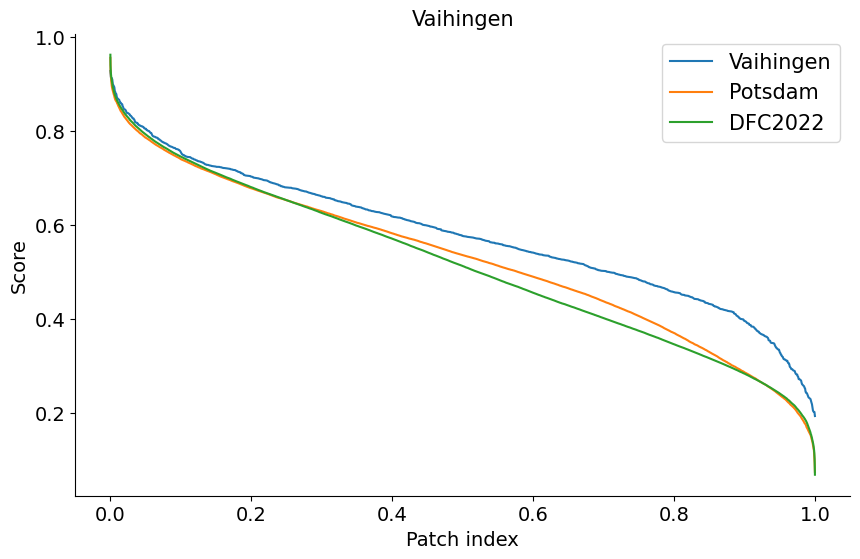

In [15]:
plt.figure(figsize=(10,6))

plt.plot(vaihingen_xs, vaihingen_mean_vals, label="Vaihingen")
#plt.fill_between(vaihingen_xs, vaihingen_mean_vals-vaihingen_std_vals, vaihingen_mean_vals+vaihingen_std_vals, alpha=0.5)

plt.plot(potsdam_xs, potsdam_mean_vals, label="Potsdam")
#plt.fill_between(potsdam_xs, potsdam_mean_vals-potsdam_std_vals, potsdam_mean_vals+potsdam_std_vals, alpha=0.5)

plt.plot(dfc2022_xs, dfc2022_mean_vals, label="DFC2022")
#plt.fill_between(dfc2022_xs, dfc2022_mean_vals-dfc2022_std_vals, dfc2022_mean_vals+dfc2022_std_vals, alpha=0.5)

plt.legend(fontsize=15)

plt.xlabel("Patch index", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("linear")
plt.title("Vaihingen", fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.close()

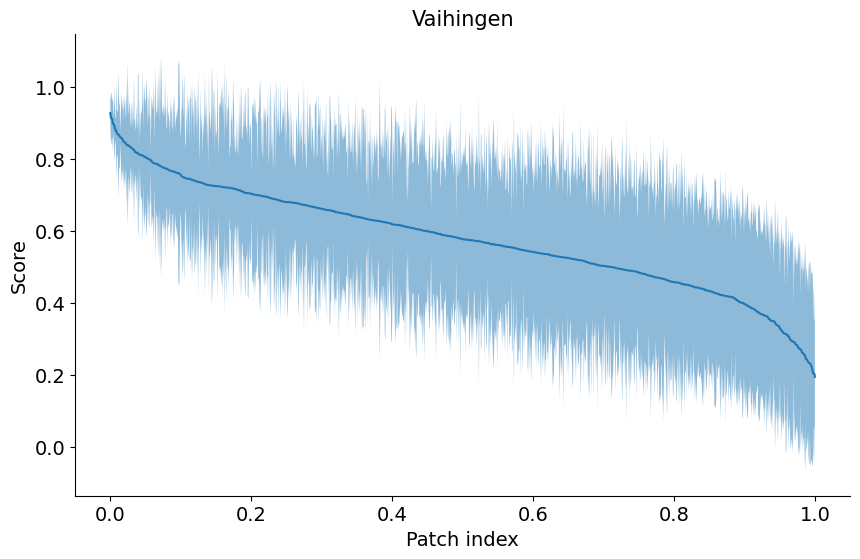

In [18]:
plt.figure(figsize=(10,6))

plt.plot(vaihingen_xs, vaihingen_mean_vals, label="Vaihingen")
plt.fill_between(vaihingen_xs, vaihingen_mean_vals-vaihingen_std_vals, vaihingen_mean_vals+vaihingen_std_vals, alpha=0.5)


plt.xlabel("Patch index", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("linear")
plt.title("Vaihingen", fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.close()

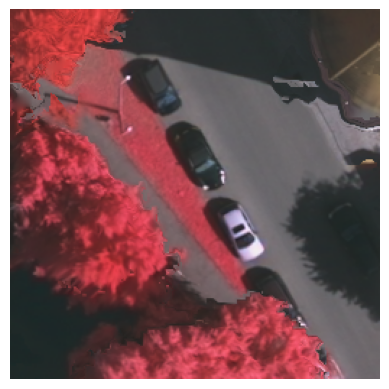

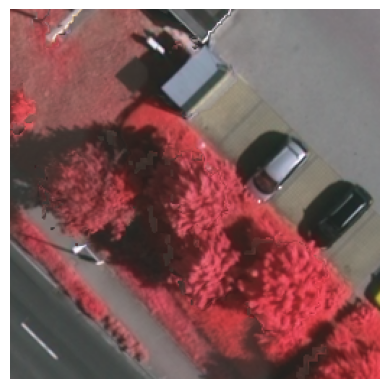

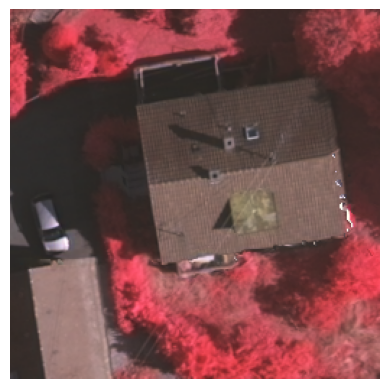

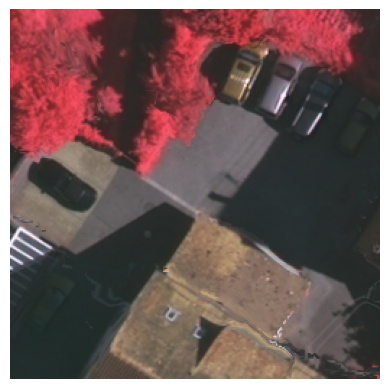

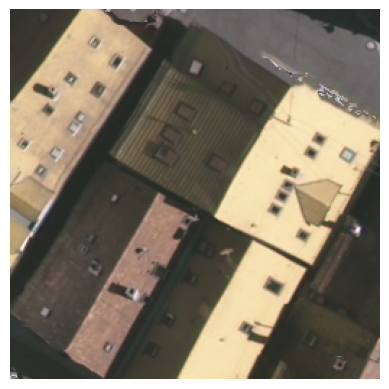

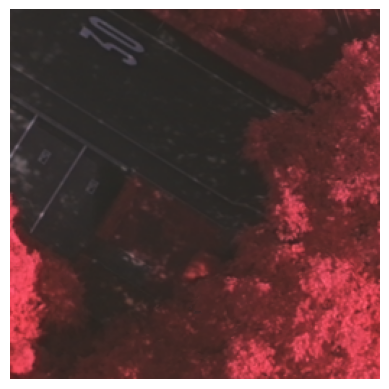

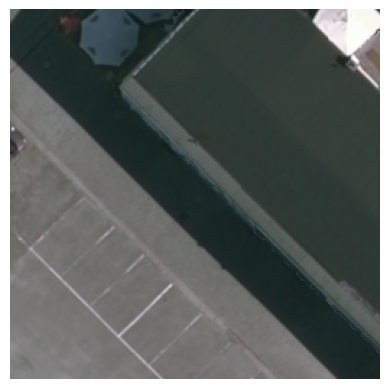

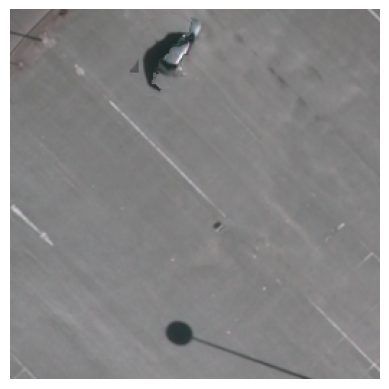

In [17]:
for key in vaihingen_keys[:4]:
    with rasterio.open(f"/home/davrob/ssdshared/sfobinsutezo/mveo/keiller_format/vaihingen/patches/images/{key}.tif") as f:
        img = f.read().transpose(1, 2, 0).astype(np.uint8)

    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    plt.close()

for key in vaihingen_keys[-4:]:
    with rasterio.open(f"/home/davrob/ssdshared/sfobinsutezo/mveo/keiller_format/vaihingen/patches/images/{key}.tif") as f:
        img = f.read().transpose(1, 2, 0).astype(np.uint8)

    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    plt.close()

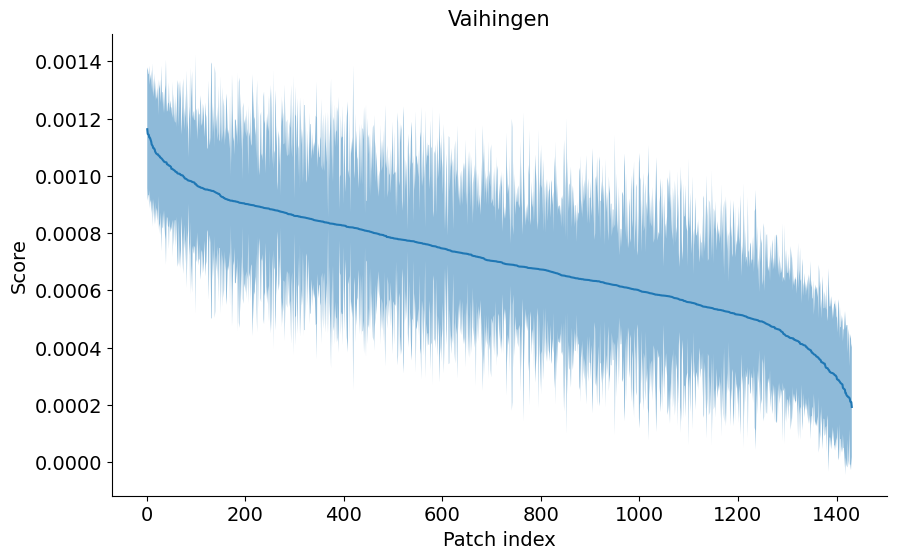

In [44]:
xs = range(1, len(mean_vals)+1)

plt.figure(figsize=(10,6))
plt.plot(xs, mean_vals)
plt.fill_between(xs, mean_vals-std_vals, mean_vals+std_vals, alpha=0.5)
plt.xlabel("Patch index", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale("linear")
plt.title("Vaihingen", fontsize=15)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()
plt.close()


